In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("iris.data")
data

,x1,x2,x3,x4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
(data['class']).nunique()  #number of classes = 3, number of instances= 150, number of features = 4
(data['x4']).nunique()
data  = data.replace('Iris-versicolor', 1)
data = data.replace('Iris-setosa', 0)
X= data.iloc[0:100, [0,2]].values
Y = data.iloc[0:100, 4].values

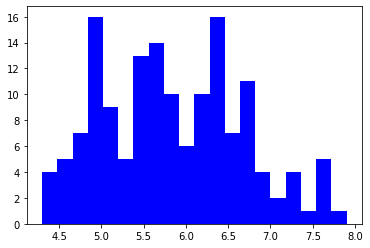

In [4]:
plt.hist(data['x1'], 20, facecolor='blue')
plt.show()

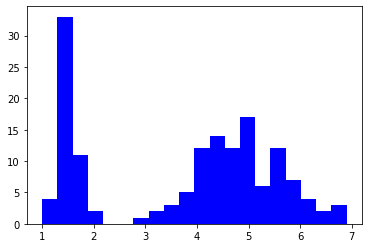

In [5]:
plt.hist(data['x3'], 20, facecolor='blue')
plt.show()

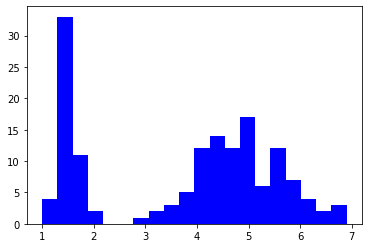

In [6]:
plt.hist(data['x3'], 20, facecolor='blue')
plt.show()

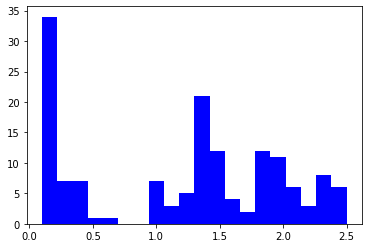

100

In [7]:
plt.hist(data['x4'], 20, facecolor='blue')
plt.show()
X.shape[0]


In [50]:
import copy 

In [28]:
def loss_function(W,X,Y,lambd=0):
  loss = (1/X.shape[0])*(np.dot(-Y.T, np.log(sigmoid(X.dot(W.T))))- np.dot((1-Y).T ,np.log(1 -sigmoid(X.dot(W.T))))) + (lambd/2)*np.dot(W, W.T)
  return loss      

In [29]:
def sigmoid(z): 
  return 1.0/(1+np.exp(-z))

In [51]:
def gradient_descent(W, X, Y, learning_rate, lambd=0):
  N = X.shape[0]
  z = X.dot(W.T)
  Y_hat = sigmoid(z)
  der_weights = copy.deepcopy(W)
  der_weights[:,0]= np.zeros(W.shape[0])
  grad = (1/N)*(np.dot(X.T, (Y_hat-Y))) + (lambd) * der_weights.T
  W = W - learning_rate*grad.T

  return W

In [52]:
print(X.shape)
print(np.concatenate((X0, X), axis = 1).shape)
print(np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])))

(432, 6)
(432, 7)
[[ 0.00121675  0.00443863  0.00333674  0.01494079 -0.00205158  0.00313068]]


In [75]:
def model(X, Y, features, epochs ,lambd=0): #features should be a list with the indexes of the features we want
  X = X[:,features]  
  X0 = np.ones((X.shape[0],1))
  X = np.concatenate((X0, X), axis = 1)
  learning_rates = [0.001, 0.01, 0.1, 0.2, 0.7]
  iterations = epochs
  W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1]))

  model_output = {
      "Learning-rate": learning_rates[0],
      "minimum-loss": float(loss_function(W, X, Y, lambd)),
      "W": np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])),
      "epoch": 0,
      "accuracy": 0
    }




  fig, (ax_loss, ax_accuracy) = plt.subplots(2,1, figsize = (15,15))
  for learning in learning_rates:
    loss = []
    accuracy = []
    np.random.seed(0)
    W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1]))
    for i in range(iterations):
      W = gradient_descent(W, X, Y, learning, lambd)
      Y_pred = np.round(sigmoid(X.dot(W.T))) 

      compute_loss = float(loss_function(W, X, Y, lambd))
      compute_accuracy = accuracy_score(Y, Y_pred)

      loss.append(compute_loss)
      accuracy.append(compute_accuracy)
      
      #Updating Weights
      

      if(compute_accuracy > model_output["accuracy"]):
        model_output["Learning-rate"] = learning
        model_output["minimum-loss"] = compute_loss
        model_output["W"] = W
        model_output["epoch"] = i
        model_output["accuracy"] = compute_accuracy
  
    ax_loss.set_title("Loss function throught epochs")
    ax_loss.set_xlabel('EPOCHS')
    ax_loss.set_ylabel('LOSS')
    ax_loss.plot(np.arange(iterations),loss, label = "learning rate " + str(learning))
    ax_loss.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax_accuracy.set_title("Accuracy throught epochs")
    ax_accuracy.set_xlabel('EPOCHS')
    ax_accuracy.set_ylabel('ACCURACY')
    ax_accuracy.plot(np.arange(iterations),accuracy, label = "learning rate " + str(learning))
    ax_accuracy.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.savefig('Learning_rate.png')
    
  return model_output
   

# Initialization data

In [54]:
from sklearn.metrics import accuracy_score
(data['class']).nunique()  #number of classes = 3, number of instances= 150, number of features = 4
(data['x4']).nunique()
data  = data.replace('Iris-versicolor', 1)
data = data.replace('Iris-setosa', 0)

## Without regularization

{'Learning-rate': 0.001,
 'minimum-loss': 0.4933062278288864,
 'W': array([[-0.04323251, -0.14528829,  0.38954442]]),
 'epoch': 919,
 'accuracy': 1.0}

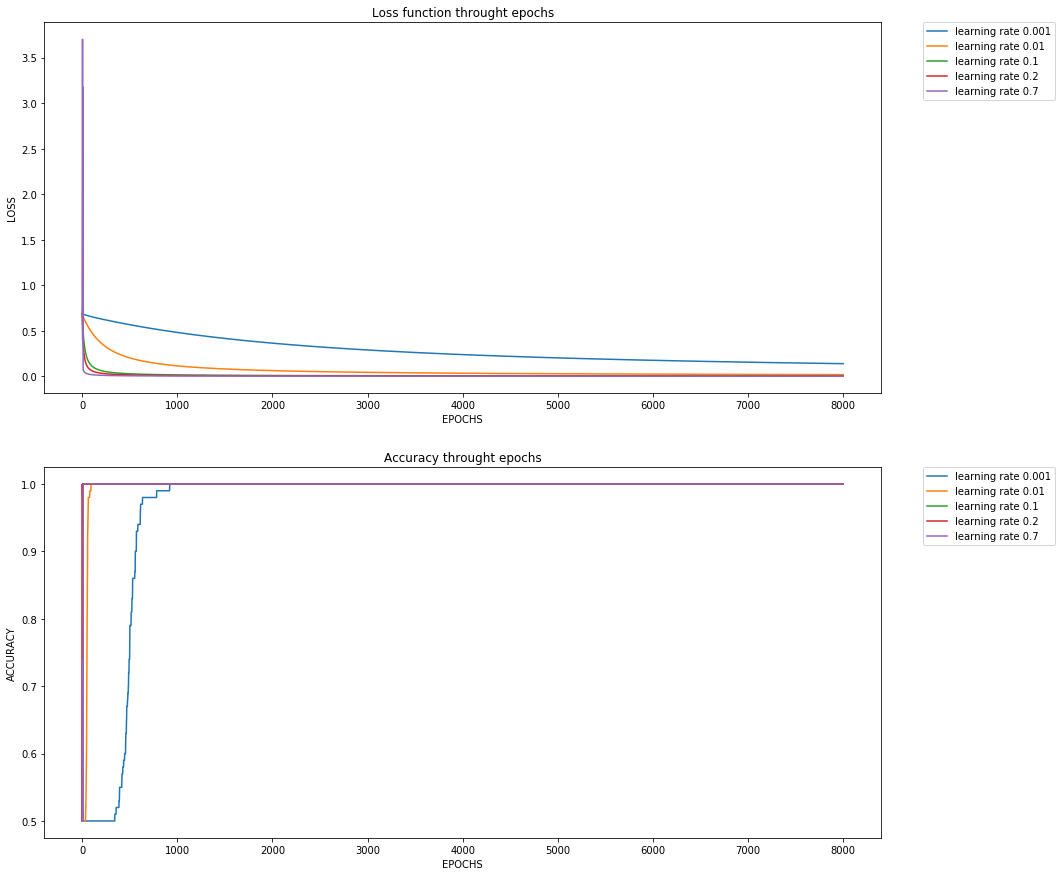

In [55]:
X = data.iloc[0:100,:-1 ].values
Y = data.iloc[0:100, -1].values
Y = (Y.reshape(100, 1))
Y = Y.astype(np.float64)
epochs = 8000
model(X, Y, [0, 2],epochs) # Without regularization


## Other combination of features

{'Learning-rate': 0.001,
 'minimum-loss': 0.6865778858989562,
 'W': array([[ 0.        , -0.00405263,  0.02232275]]),
 'epoch': 46,
 'accuracy': 1.0}

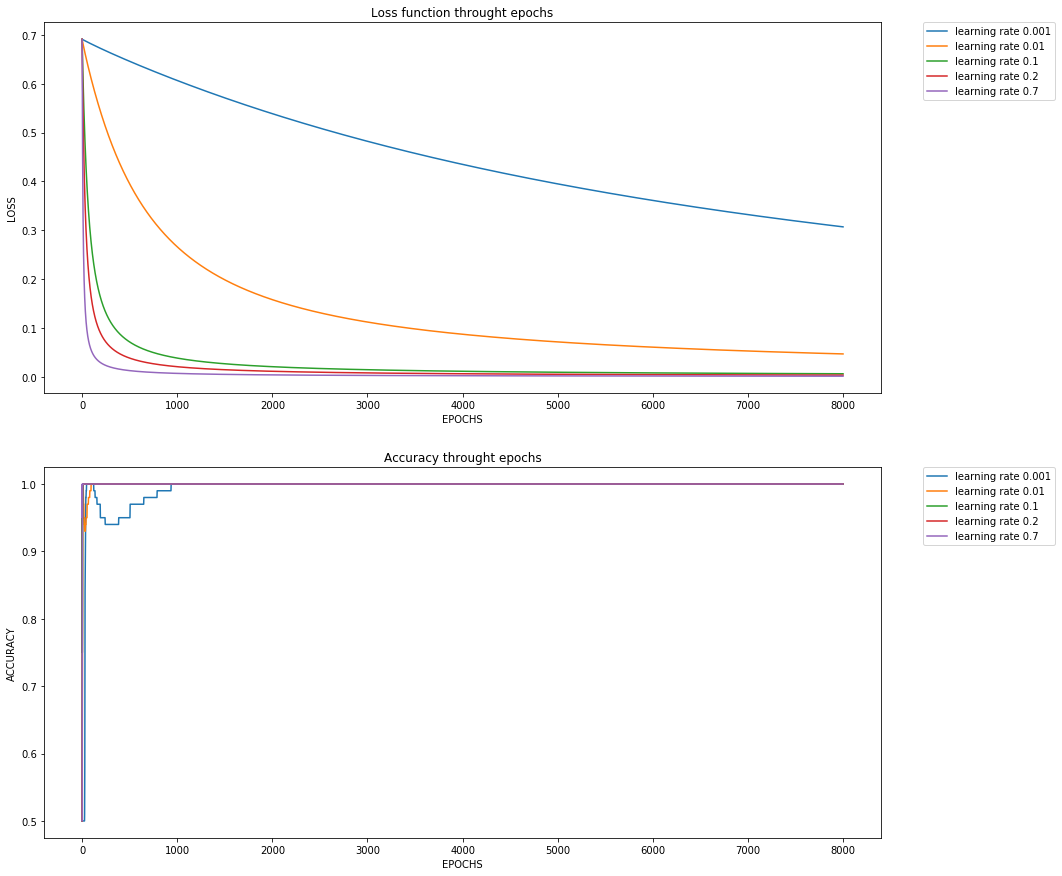

In [402]:
X = data.iloc[0:100,:-1 ].values
Y = data.iloc[0:100, -1].values
Y = (Y.reshape(100, 1))
Y = Y.astype(np.float64)
epochs = 8000
model(X, Y, [1, 3],epochs) # Without regularization

## With regularization

{'Learning-rate': 0.001,
 'minimum-loss': 0.5392368434403811,
 'W': array([[ 0.        , -0.15229726,  0.3846811 ]]),
 'epoch': 1286,
 'accuracy': 1.0}

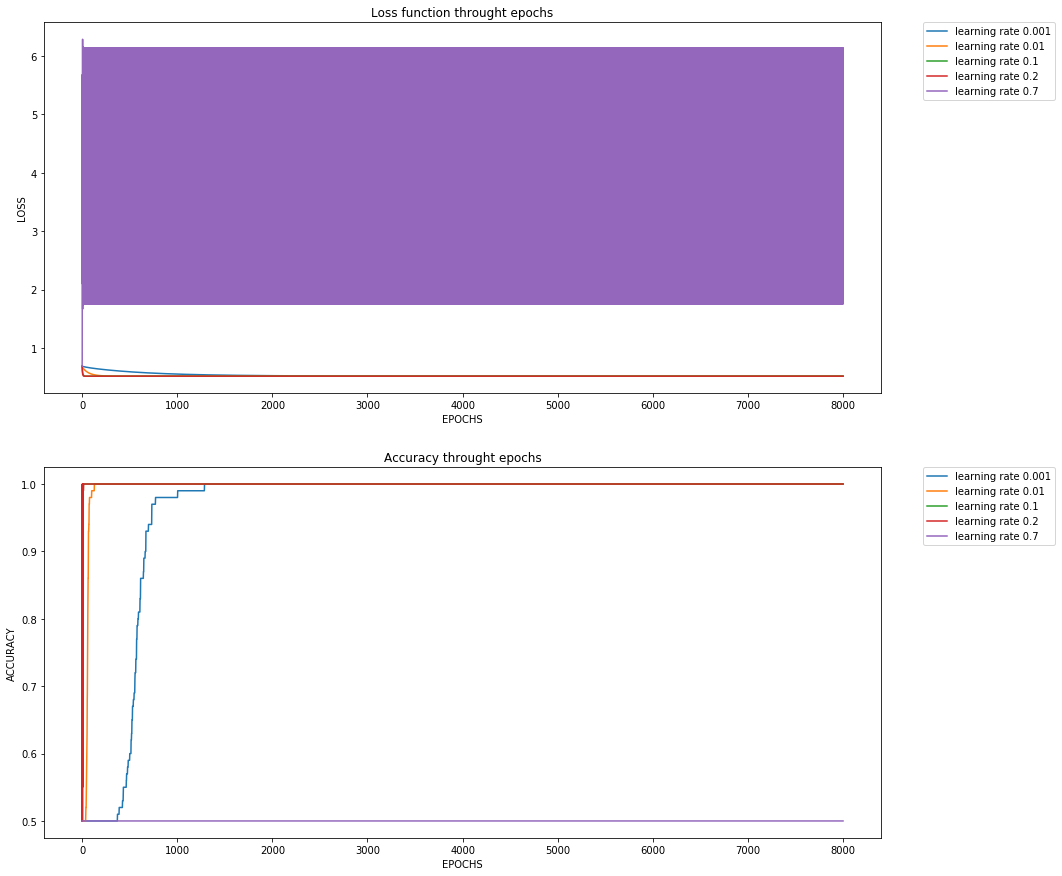

In [37]:
X = data.iloc[0:100,:-1 ].values
Y = data.iloc[0:100, -1].values
Y = (Y.reshape(100, 1))
Y = Y.astype(np.float64)
epochs = 8000
lamdb = 0.5
model(X, Y, [0,2], epochs, lamdb) # With regularization

## Monk2 dataset

monk = pd.read_csv("monk2.csv")
monk

In [76]:
monk = pd.read_csv("monk2.csv") 
X = monk.iloc[:,:-1].values
Y = monk.iloc[:,-1].values
Y = (Y.reshape(Y.shape[0], 1))
Y = Y.astype(np.float64)
W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])) 
epochs= 15000


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)

## Without regularization

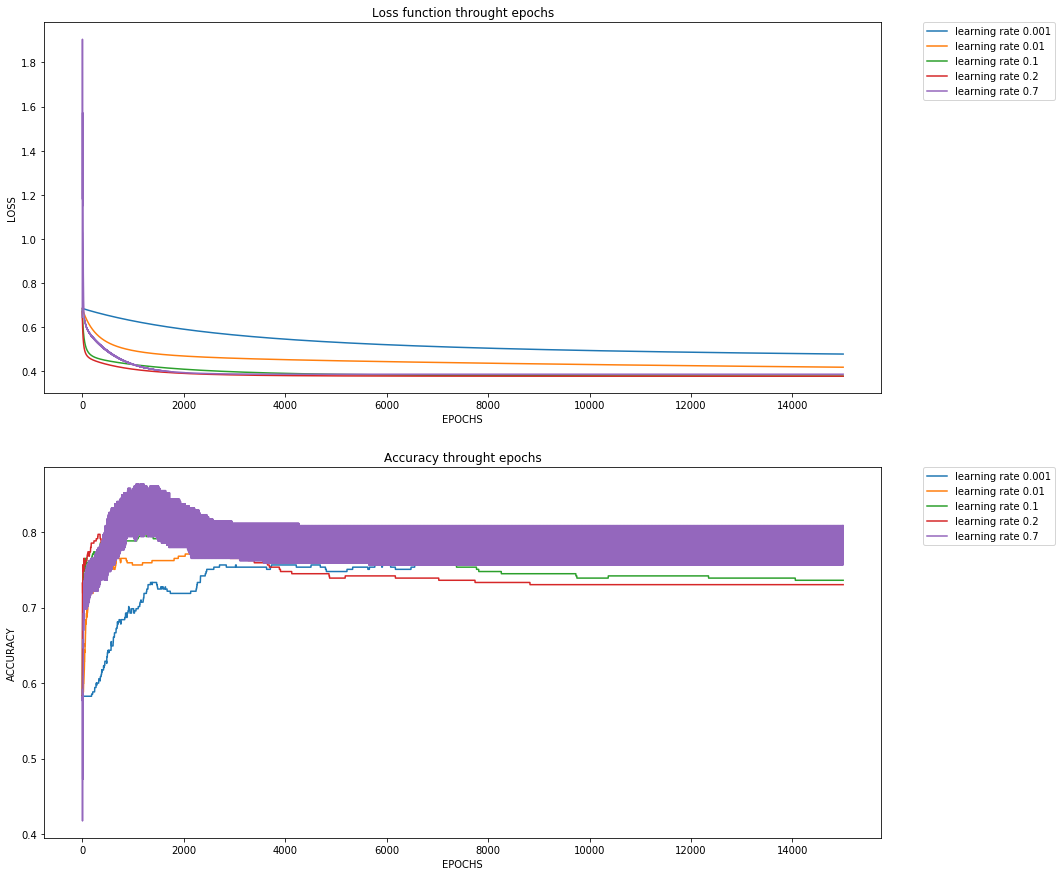

In [78]:
model_output = model(X_train, Y_train, [0,1,2,3,4,5], epochs)

In [79]:
model_output

{'Learning-rate': 0.7,
 'minimum-loss': 0.4275225567085136,
 'W': array([[ 7.90170783,  0.28576064, -2.41189074,  0.23518155, -0.16586679,
         -1.72029463,  0.08729526]]),
 'epoch': 1061,
 'accuracy': 0.863768115942029}

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)
X_train = X_train[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X0_test, X_train), axis = 1)

In [83]:
Y_pred_train = np.round(sigmoid(X_train.dot(model_output["W"].T)))
print("Accuracy train =  " + str(accuracy_score(Y_train, Y_pred_train)))
print("Loss training = " + str(float(loss_function(model_output["W"], X_train, Y_train))))

Accuracy train =  0.863768115942029
Loss training = 0.4275225567085136


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)
X_test = X_test[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_test.shape[0],1))
X_test = np.concatenate((X0_test, X_test), axis = 1)

In [87]:
Y_pred_test = np.round(sigmoid(X_test.dot(model_output["W"].T)))
print("Accuracy test = " + str(accuracy_score(Y_test, Y_pred_test)))
print("Loss training = " + str(float(loss_function(model_output["W"], X_test, Y_test))))

Accuracy test = 0.8850574712643678
Loss training = 0.3808287203042088


## With Regularization

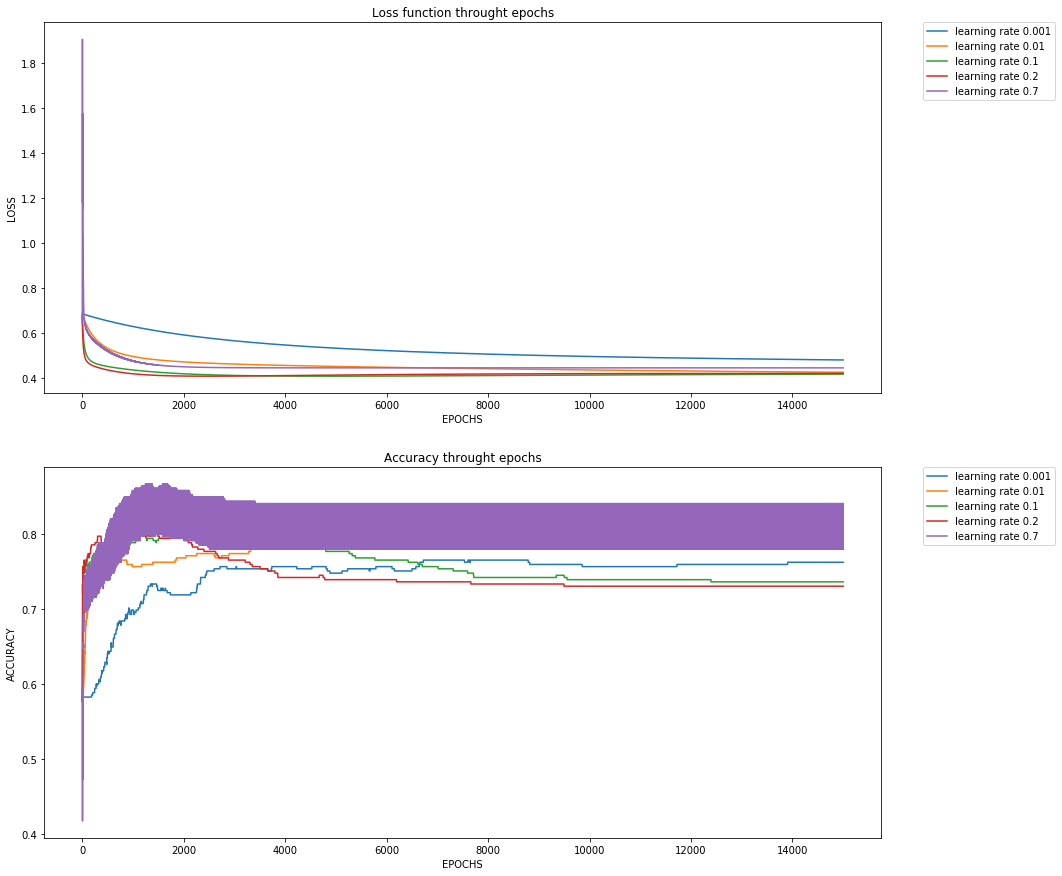

In [97]:
X = monk.iloc[:,:-1].values
Y = monk.iloc[:,-1].values
Y = (Y.reshape(Y.shape[0], 1))
Y = Y.astype(np.float64)
W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])) 
lambd = 0.001
model_output_reg = model(X_train, Y_train, [0,1,2,3,4,5], epochs, lambd)

In [99]:
model_output_reg

{'Learning-rate': 0.7,
 'minimum-loss': 0.46439966121272225,
 'W': array([[ 8.27783735,  0.2480379 , -2.42179018,  0.16599487, -0.19272513,
         -1.72980125,  0.02396336]]),
 'epoch': 1247,
 'accuracy': 0.8666666666666667}

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)
X_train = X_train[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X0_test, X_train), axis = 1)

In [101]:
Y_pred_train = np.round(sigmoid(X_train.dot(model_output_reg["W"].T)))
print("Accuracy train =  " + str(accuracy_score(Y_train, Y_pred_train)))
print("Loss training" + str(float(loss_function(model_output["W"], X_train, Y_train))))

Accuracy train =  0.8666666666666667
Loss training0.4275225567085136


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)
X_test = X_test[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_test.shape[0],1))
X_test = np.concatenate((X0_test, X_test), axis = 1)

In [103]:
Y_pred_test = np.round(sigmoid(X_test.dot(model_output_reg["W"].T)))
print("Accuracy = " + str(accuracy_score(Y_test, Y_pred_test)))
print("Loss test = " + str(float(loss_function(model_output["W"], X_test, Y_test))))

Accuracy = 0.896551724137931
Loss test = 0.3808287203042088
